# Testing correlation function

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps,
    mpl,glob
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

import cftime

from cloud_metric import Cloud_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Taylor plot specific imports

In [4]:
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/CESM2_COSP/taylor_plots/')

import taylor_jshaw as taylor
import matplotlib as matplotlib
import matplotlib.patches as patches

In [5]:
from interp_functions import *
from functions import calculate

#### I am reorganizing to have everything in this first directory

In [6]:
# where to save processed files
save_dir = '/glade/u/home/jonahshaw/w/archive/taylor_files/'

In [75]:
og_dir = '/glade/u/home/jonahshaw/w/kay2012_OGfiles'

### Different files for use

Obs

In [51]:
misr_og = xr.open_dataset('%s/2012_obs/MISR.CLDTOT_MISR.nc' % save_dir)['CLDTOT_MISR']
misr_new = xr.open_dataset('%s/2021_obs/MISR_CLDTOT_200003_202005.nc' % save_dir)['cltMISR']

In [102]:
# Not masked
misr_new_avg = misr_new.groupby('time.month').mean('time').mean('month')

# Fix longitude
misr_new_flip = misr_new_avg.assign_coords(lon=(misr_new_avg.lon % 360)).sortby('lon')

misr_new_m = misr_new_flip.where(misr_new_flip!=0).interp_like(misr_og)

In [103]:
misr_cam5 = xr.open_dataset('%s/CAM5.CLDTOT_MISR.nc' % og_dir)['CLDTOT_MISR']

misr_cam5_intrp = misr_cam5.interp_like(misr_og)

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'CLMISR' has multiple fill values {-1e+30, -999.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'CLDTOT_MISR' has multiple fill values {-1e+30, -999.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


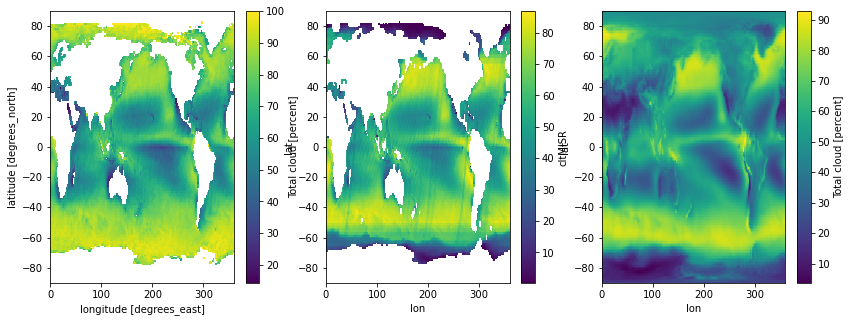

In [104]:
fig,axs = plt.subplots(1,3,figsize=(14,5))

misr_og.plot(ax=axs[0])
misr_new_m.plot(ax=axs[1])
misr_cam5_intrp.plot(ax=axs[2])

The correlation calculation is clearly not working.

In [105]:
calculate(misr_cam5_intrp,misr_og)

(0.26316735847738537,
 0.8400562663987324,
 0.5428284050634469,
 0.8589562203055783,
 14.733800703233136)

In [ ]:
calculate(misr_new_m,misr_og)

In [ ]:
_misr_og = add_weights(misr_og)
       
mask = np.bitwise_or(xr.ufuncs.isnan(cntl),xr.ufuncs.isnan(test)) # mask means hide

In [107]:
misr_new60 = misr_new_m.where(np.abs(misr_new_m.lat)<60)

In [108]:
misr_og60 = misr_og.where(np.abs(misr_og.lat)<60)

Still bad when I remove high latitudes.

In [111]:
calculate(misr_new60,misr_og60)

(0.1531654657073897,
 0.8797485494438966,
 0.5117141157539822,
 1.0689808041599436,
 9.170960869228907)

In [116]:
calculate(misr_new60,misr_cam5_intrp)

(-0.08456928991310537,
 0.7005591360943183,
 0.939669005989685,
 1.311919049715469,
 -5.061082940664029)

In [117]:
calculate(misr_cam5_intrp,misr_og60)

(0.2575780013853046,
 0.862687189952756,
 0.5074522043543286,
 0.8210107277749507,
 14.106323411957113)

Now the correlation looks right...

These values should not be so different. 7% is a lot.

In [70]:
(misr_new60-misr_og60).mean()

<xarray.DataArray ()>
array(-9.926216, dtype=float32)

#### They should be much higher correlated

In [71]:
calculate(misr_new60,misr_og60)

(-0.17135005842762027,
 0.36613270217159066,
 1.2849428159807779,
 1.4369886715146032,
 -10.201789250876423)

In [74]:
calculate(misr_new_m,misr_og)

(-0.15771508044547797,
 0.27967160417666154,
 1.1583248346459507,
 1.2675996615847809,
 -9.032336318922333)

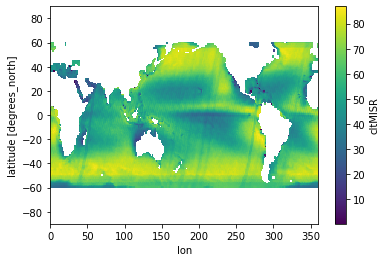

In [72]:
misr_new60.plot()

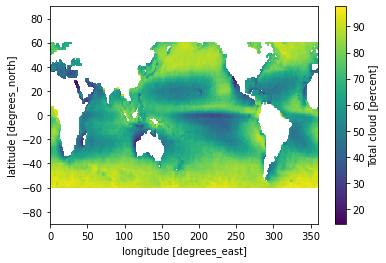

In [73]:
misr_og60.plot()

Models

In [23]:
misr_cam4 = xr.open_dataset('%s/cam4_1deg_release_amip/cam4_1deg_release_amip.CLDTOT_MISR.nc' % save_dir)
misr_cam5 = xr.open_dataset('%s/cam5_1deg_release_amip/cam5_1deg_release_amip.CLDTOT_MISR.nc' % save_dir)
misr_cam6 = xr.open_dataset('%s/f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1/f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.CLDTOT_MISR.nc' % save_dir)

In [22]:
ls $save_dir/f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1

f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.CLDHGH_CAL.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.CLDLOW_CAL.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.CLDMED_CAL.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.CLDTOT_CAL.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.CLDTOT_ISCCP.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.LANDFRAC.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.LWCF.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.cam.h0.SWCF.197901-201412.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.CLDTHCK_MISR.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.CLDTHCK_MODIS.nc
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1.CLDTOT_MISR.nc
old/
